In [2]:
#Importing All The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [4]:
xls_file=pd.ExcelFile('C:\Users\Amardeep\Downloads\RFAQ.xlsx')
AQ=xls_file.parse('Sheet1')

In [31]:
AQ.describe

<bound method DataFrame.describe of        pm2.5  DEWP  TEMP    PRES  Station Pressure     Iws  Is  Ir  \
0        129   -16  -4.0  1020.0        985.731782    1.79   0   0   
1        148   -15  -4.0  1020.0        985.732185    2.68   0   0   
2        159   -11  -5.0  1021.0        986.698589    3.57   0   0   
3        181    -7  -5.0  1022.0        987.664993    5.36   1   0   
4        138    -7  -5.0  1022.0        987.664993    6.25   2   0   
5        109    -7  -6.0  1022.0        987.664993    7.14   3   0   
6        105    -7  -6.0  1023.0        988.631397    8.93   4   0   
7        124    -7  -5.0  1024.0        989.597801   10.72   0   0   
8        132    -7  -5.0  1025.0        990.564206   14.30   0   0   
9        140    -7  -5.0  1026.0        991.530610   17.43   1   0   
10       152    -8  -5.0  1026.0        991.530610   20.56   0   0   
11       148    -8  -5.0  1026.0        991.530610   23.69   0   0   
12       164    -8  -5.0  1025.0        990.564206   2

In [36]:
y=AQ['Quality']

In [49]:
X=AQ.drop(columns=['Quality','pm2.5'])

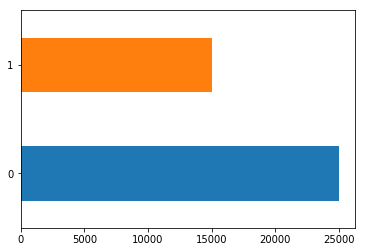

In [126]:
AQ['Quality'].value_counts().plot(kind='barh')

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

In [128]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200,max_depth=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.8345386533665835)


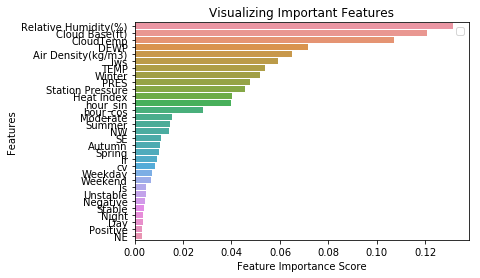

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Relative Humidity(%)    0.131599
Cloud Base(ft)          0.120794
CloudTemp               0.106972
DEWP                    0.071536
Air Density(kg/m3)      0.064967
Iws                     0.059390
TEMP                    0.053978
Winter                  0.051662
PRES                    0.047614
Station Pressure        0.045519
Heat Index              0.040358
hour_sin                0.039729
hour_cos                0.028322
Moderate                0.015447
Summer                  0.014549
NW                      0.014353
SE                      0.010970
Autumn                  0.010465
Spring                  0.010186
Ir                      0.009186
cv                      0.008278
Weekday                 0.007038
Weekend                 0.006627
Is                      0.004748
Unstable                0.004530
Negative                0.004170
Stable                  0.003701
Night                   0.003606
Day                     0.003533
Positive                0.003139
NE        

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,DEWP,[0.011989064757533375]
1,TEMP,[0.011989799041034963]
2,PRES,[8.762922309199789e-05]
3,Station Pressure,[8.464345993817428e-05]
4,Iws,[0.010834959960338461]
5,Is,[0.15345115153107913]
6,Ir,[0.3262471736463691]
7,Relative Humidity(%),[-0.023296023639146977]
8,Cloud Base(ft),[0.00030038512111504255]
9,Air Density(kg/m3),[0.027879300022030547]


TypeError: unhashable type: 'numpy.ndarray'

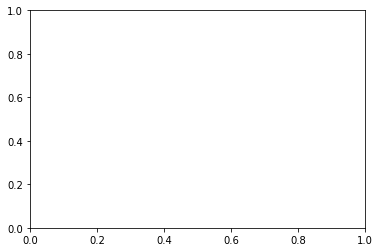

In [135]:
plt.plot()